In [1]:
import os
import sys
import warnings

os.chdir("../..")
sys.path.append("../../")
warnings.filterwarnings("ignore")

# Evaluate clustering goodness-of-fit

## Introduction

In this example, we will show how to use scDesign3Py to evaluate the clustering goodness-of-fit for different cell-type assignments. If the true labels are unavailable and we have little prior knowledge, the scDesign3Py BIC can serve as an unsupervised metric.

## Import packages and Read in data

### import pacakges

In [2]:
import anndata as ad
import pandas as pd
import scanpy as sc
import scDesign3Py

from sklearn.metrics import adjusted_rand_score

The R project used is located at /home/ld/anaconda3/envs/pyscdesign/lib/R


### Read in data

The raw data is from the R package `DuoClustering2018` and converted to `.h5ad` file using the R package `sceasy`.

The cluster result is also got from the R package `DuoClustering2018` as the package has already provided various clustering results.

In [3]:
data = ad.read_h5ad("data/Zhengmix4eq.h5ad")
cluster_res = pd.read_csv("data/clusterres_Zhengmix4eq.csv",index_col=0)
cluster_res = cluster_res[cluster_res["method"].isin(["PCAKmeans"]) & (cluster_res["run"] == 1)]

For demonstration purpose, we use the `Zhengmix4eq` dataset in the package with top 30 highly variable genes and the corresponding k-means clustering results with $k = 2 \sim 10$.

In [4]:
kmeans_res = cluster_res.groupby("k")
ncell = data.n_obs
ngene = 30
ntrain = int(ncell/5)

# choose HVG genes
data.layers["log"] = data.X.copy()
sc.pp.normalize_total(data,target_sum=1e4,layer="log")
sc.pp.log1p(data,layer="log")
sc.pp.highly_variable_genes(data,layer="log",n_top_genes=ngene)
data = data[:,data.var["highly_variable"] == True]

train_data = data[data.obs.sample(n=ntrain,random_state=123).index,:]
train_data

View of AnnData object with n_obs × n_vars = 711 × 30
    obs: 'barcode', 'phenoid', 'total_features', 'log10_total_features', 'total_counts', 'log10_total_counts', 'pct_counts_top_50_features', 'pct_counts_top_100_features', 'pct_counts_top_200_features', 'pct_counts_top_500_features', 'sizeFactor', 'cell_type'
    var: 'id', 'symbol', 'mean_counts', 'log10_mean_counts', 'rank_counts', 'n_cells_counts', 'pct_dropout_counts', 'total_counts', 'log10_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'X_pca', 'X_tsne'
    layers: 'logcounts', 'normcounts', 'log'

## Simulation

We then use different cell-type clustering information to simulate new data.

In [5]:
simu_res = {}

In [6]:
for key,value in kmeans_res:
    print(f"K number: {key} fitting.")
    tmp = value[["cell","cluster"]]
    tmp.index = tmp["cell"]
    train_data.obs["cell_type"] = tmp.loc[train_data.obs.index,"cluster"].tolist()
    train_data.obs["cell_type"] = train_data.obs["cell_type"].astype("int").astype("str").astype("category")

    test = scDesign3Py.scDesign3(n_cores=2, parallelization="pbmcmapply")
    test.set_r_random_seed(123)
    res = test.scdesign3(anndata=train_data, 
                        celltype = 'cell_type',
                        corr_formula = "1", 
                        mu_formula = "cell_type", 
                        sigma_formula = "cell_type", 
                        copula = "gaussian", 
                        default_assay_name = "counts", 
                        family_use = "nb",
                        usebam = False)

    simu_res[key] = res

K number: 2 fitting.


R[write to console]: Input Data Construction Start

R[write to console]: Input Data Construction End

R[write to console]: Start Marginal Fitting



  |=======================================================| 100%, Elapsed 00:02


R[write to console]: Marginal Fitting End

R[write to console]: Start Copula Fitting

R[write to console]: Convert Residuals to Multivariate Gaussian



  |=======================================================| 100%, Elapsed 00:01


R[write to console]: Converting End

R[write to console]: Copula group 1 starts

R[write to console]: Copula Fitting End

R[write to console]: Start Parameter Extraction



  |=======================================================| 100%, Elapsed 00:01


R[write to console]: Parameter
Extraction End

R[write to console]: Start Generate New Data

R[write to console]: Use Copula to sample a multivariate quantile matrix

R[write to console]: Sample Copula group 1 starts



  |=======================================================| 100%, Elapsed 00:00


R[write to console]: New Data Generating End



K number: 3 fitting.


R[write to console]: Input Data Construction Start

R[write to console]: Input Data Construction End

R[write to console]: Start Marginal Fitting



  |=======================================================| 100%, Elapsed 00:02


R[write to console]: Marginal Fitting End

R[write to console]: Start Copula Fitting

R[write to console]: Convert Residuals to Multivariate Gaussian



  |=======================================================| 100%, Elapsed 00:01


R[write to console]: Converting End

R[write to console]: Copula group 1 starts

R[write to console]: Copula Fitting End

R[write to console]: Start Parameter Extraction



  |=======================================================| 100%, Elapsed 00:01


R[write to console]: Parameter
Extraction End

R[write to console]: Start Generate New Data

R[write to console]: Use Copula to sample a multivariate quantile matrix

R[write to console]: Sample Copula group 1 starts



  |=======================================================| 100%, Elapsed 00:00


R[write to console]: New Data Generating End



K number: 4 fitting.


R[write to console]: Input Data Construction Start

R[write to console]: Input Data Construction End

R[write to console]: Start Marginal Fitting



  |=======================================================| 100%, Elapsed 00:03


R[write to console]: Marginal Fitting End

R[write to console]: Start Copula Fitting

R[write to console]: Convert Residuals to Multivariate Gaussian



  |=======================================================| 100%, Elapsed 00:01


R[write to console]: Converting End

R[write to console]: Copula group 1 starts

R[write to console]: Copula Fitting End

R[write to console]: Start Parameter Extraction



  |=======================================================| 100%, Elapsed 00:01


R[write to console]: Parameter
Extraction End

R[write to console]: Start Generate New Data

R[write to console]: Use Copula to sample a multivariate quantile matrix

R[write to console]: Sample Copula group 1 starts



  |=======================================================| 100%, Elapsed 00:00


R[write to console]: New Data Generating End



K number: 5 fitting.


R[write to console]: Input Data Construction Start

R[write to console]: Input Data Construction End

R[write to console]: Start Marginal Fitting



  |=======================================================| 100%, Elapsed 00:02


R[write to console]: Marginal Fitting End

R[write to console]: Start Copula Fitting

R[write to console]: Convert Residuals to Multivariate Gaussian



  |=======================================================| 100%, Elapsed 00:01


R[write to console]: Converting End

R[write to console]: Copula group 1 starts

R[write to console]: Copula Fitting End

R[write to console]: Start Parameter Extraction



  |=======================================================| 100%, Elapsed 00:01


R[write to console]: Parameter
Extraction End

R[write to console]: Start Generate New Data

R[write to console]: Use Copula to sample a multivariate quantile matrix

R[write to console]: Sample Copula group 1 starts



  |=======================================================| 100%, Elapsed 00:00


R[write to console]: New Data Generating End



K number: 6 fitting.


R[write to console]: Input Data Construction Start

R[write to console]: Input Data Construction End

R[write to console]: Start Marginal Fitting



  |=======================================================| 100%, Elapsed 00:02


R[write to console]: Marginal Fitting End

R[write to console]: Start Copula Fitting

R[write to console]: Convert Residuals to Multivariate Gaussian



  |=======================================================| 100%, Elapsed 00:01


R[write to console]: Converting End

R[write to console]: Copula group 1 starts

R[write to console]: Copula Fitting End

R[write to console]: Start Parameter Extraction



  |=======================================================| 100%, Elapsed 00:01


R[write to console]: Parameter
Extraction End

R[write to console]: Start Generate New Data

R[write to console]: Use Copula to sample a multivariate quantile matrix

R[write to console]: Sample Copula group 1 starts



  |=======================================================| 100%, Elapsed 00:00


R[write to console]: New Data Generating End



K number: 7 fitting.


R[write to console]: Input Data Construction Start

R[write to console]: Input Data Construction End

R[write to console]: Start Marginal Fitting



  |=======================================================| 100%, Elapsed 00:02


R[write to console]: Marginal Fitting End

R[write to console]: Start Copula Fitting

R[write to console]: Convert Residuals to Multivariate Gaussian



  |=======================================================| 100%, Elapsed 00:01


R[write to console]: Converting End

R[write to console]: Copula group 1 starts

R[write to console]: Copula Fitting End

R[write to console]: Start Parameter Extraction



  |=======================================================| 100%, Elapsed 00:01


R[write to console]: Parameter
Extraction End

R[write to console]: Start Generate New Data

R[write to console]: Use Copula to sample a multivariate quantile matrix

R[write to console]: Sample Copula group 1 starts



  |=======================================================| 100%, Elapsed 00:00


R[write to console]: New Data Generating End



K number: 8 fitting.


R[write to console]: Input Data Construction Start

R[write to console]: Input Data Construction End

R[write to console]: Start Marginal Fitting



  |=======================================================| 100%, Elapsed 00:02


R[write to console]: Marginal Fitting End

R[write to console]: Start Copula Fitting

R[write to console]: Convert Residuals to Multivariate Gaussian



  |=======================================================| 100%, Elapsed 00:01


R[write to console]: Converting End

R[write to console]: Copula group 1 starts

R[write to console]: Copula Fitting End

R[write to console]: Start Parameter Extraction



  |=======================================================| 100%, Elapsed 00:01


R[write to console]: Parameter
Extraction End

R[write to console]: Start Generate New Data

R[write to console]: Use Copula to sample a multivariate quantile matrix

R[write to console]: Sample Copula group 1 starts



  |=======================================================| 100%, Elapsed 00:00


R[write to console]: New Data Generating End



K number: 9 fitting.


R[write to console]: Input Data Construction Start

R[write to console]: Input Data Construction End

R[write to console]: Start Marginal Fitting



  |=======================================================| 100%, Elapsed 00:02


R[write to console]: Marginal Fitting End

R[write to console]: Start Copula Fitting

R[write to console]: Convert Residuals to Multivariate Gaussian



  |=======================================================| 100%, Elapsed 00:01


R[write to console]: Converting End

R[write to console]: Copula group 1 starts

R[write to console]: Copula Fitting End

R[write to console]: Start Parameter Extraction



  |=======================================================| 100%, Elapsed 00:01


R[write to console]: Parameter
Extraction End

R[write to console]: Start Generate New Data

R[write to console]: Use Copula to sample a multivariate quantile matrix

R[write to console]: Sample Copula group 1 starts



  |=======================================================| 100%, Elapsed 00:00


R[write to console]: New Data Generating End



K number: 10 fitting.


R[write to console]: Input Data Construction Start

R[write to console]: Input Data Construction End

R[write to console]: Start Marginal Fitting



  |=======================================================| 100%, Elapsed 00:02


R[write to console]: Marginal Fitting End

R[write to console]: Start Copula Fitting

R[write to console]: Convert Residuals to Multivariate Gaussian



  |=======================================================| 100%, Elapsed 00:01


R[write to console]: Converting End

R[write to console]: Copula group 1 starts

R[write to console]: Copula Fitting End

R[write to console]: Start Parameter Extraction



  |=======================================================| 100%, Elapsed 00:01


R[write to console]: Parameter
Extraction End

R[write to console]: Start Generate New Data

R[write to console]: Use Copula to sample a multivariate quantile matrix

R[write to console]: Sample Copula group 1 starts



  |=======================================================| 100%, Elapsed 00:00


R[write to console]: New Data Generating End



## Visualization

After the simulations, we can check the BIC provided by our package and the calculated ARI to evaluate k-means clustering qualities.

In [7]:
import matplotlib.pyplot as plt

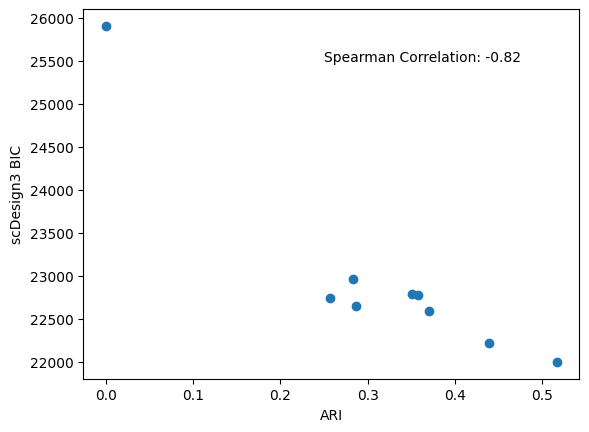

In [8]:
bics = pd.Series([v["model_bic"]["bic.marginal"] for v in simu_res.values()])
ari = pd.Series([adjusted_rand_score(v["cluster"],v["trueclass"]) for _,v in kmeans_res])
spearman_corr = bics.corr(ari,method="spearman")

# plot
plt.scatter(x=ari,y=bics)
plt.xlabel('ARI')
plt.ylabel('scDesign3 BIC')
plt.text(x=0.25,y=25500,s="Spearman Correlation: %.2f" % spearman_corr)
plt.show()